# UTSA CS 3793: Assignment-3

**Anderson-Pola - Keanu - (tro893)**






## Learning Objectives

Implement 2 different machine learning algorithms
*   Stochastic Gradient Descent
*   ID3 Decision Tree



## Description

This assignment is focused on **machine learning**, mainly on the implementation of 2 different algorithms - Stochastic Gradient Descent & ID3 decision tree.
The assignment is divided into two sections, each for one unique ML algorithm.

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library that contains the implementation of ML algorithms. You can get pieces of code from online, but please cite the source properly.


##Import Libraries

Write all the import statements here. This should be for both algorithm implmentations. As mentioned before, you can not use any premade ML libraries.

In [ ]:
# import all required libraries
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from collections import Counter

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"


#Stochastic Gradient Descent

In this section, you will implement the Stochastic Gradient Descent algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that you are given **all binary-valued attributes** and that there are **no missing values** in the train or test data.


##Algorithm

(40 points)

Following are the data files that will be provided to you for the gradient descent algorithm implementation.

*   Training file - 'gd-train.dat'
*   Testing file - 'gd-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are different example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments.



In [ ]:
# Data file name variables for SGD
train_gd_path = basePath + "gd-train.dat"
test_gd_path = basePath + "gd-test.dat"

# Data file name variables for ID3
train_id3_path = basePath + "id3-train.dat"
test_id3_path = basePath + "id3-test.dat"

In [ ]:
# Read the training and testing data files
train_gd = pd.read_csv(train_gd_path, delim_whitespace=True)
test_gd = pd.read_csv(test_gd_path, delim_whitespace=True)
train_id3 = pd.read_csv(train_id3_path, delim_whitespace=True)
test_id3 = pd.read_csv(test_id3_path, delim_whitespace=True)

In [ ]:
# Activation Function - implement Sigmoid
def activation_function(h):
  # given 'h' compute and return 'z' based on the activation function implemented
  return 1 / (1 + np.exp(-h))


In [ ]:
# Train the model using the given training dataset and the learning rate
# return the "weights" learnt for the perceptron - include the weight assocaited with bias as the last entry
def train_model(train_data, learning_rate=0.05):
  num_features = train_data.shape[1] - 1
  weights = np.zeros(num_features + 1)
  for index, row in train_data.iterrows():
    x = np.append(row[:-1], 1)  # Adding bias
    y = row[-1]
    h = np.dot(weights, x)
    z = activation_function(h)
    error = y - z
    weights += learning_rate * error * x
  return weights


In [ ]:
# Test the model (weights learnt) using the given test dataset
# return the accuracy value
def test(test_data, weights, threshold):
  correct_predictions = 0
  for index, row in test_data.iterrows():
    x = np.append(row[:-1], 1)  # Adding bias
    y = row[-1]
    h = np.dot(weights, x)
    z = activation_function(h)
    prediction = 1 if z >= threshold else 0
    if prediction == y:
      correct_predictions += 1
  accuracy = correct_predictions / len(test_data)
  return accuracy


In [ ]:
# Gradient Descent function
def gradient_descent(df_train, df_test, learning_rate=0.05, threshold=0.5):
  weights = train_model(df_train, learning_rate)
  train_accuracy = test(df_train, weights, threshold)
  test_accuracy = test(df_test, weights, threshold)
  return train_accuracy, test_accuracy


In [ ]:
# Threshold of 0.5 will be used to classify the instance for the test. If the value is >= 0.5, classify as 1 or else 0.
threshold = 0.5


In [ ]:
# Main algorithm loop
learning_rates = [round(0.05 * i, 2) for i in range(1, 21)]
for lr in learning_rates:
  train_acc, test_acc = gradient_descent(train_gd, test_gd, learning_rate=lr)
  print(f"Accuracy for LR of {lr} on Training data = {train_acc:.2f}")
  print(f"Accuracy for LR of {lr} on Testing data = {test_acc:.2f}")

Accuracy for LR of 0.05 on Training data = 0.68
Accuracy for LR of 0.05 on Testing data = 0.72
Accuracy for LR of 0.1 on Training data = 0.68
Accuracy for LR of 0.1 on Testing data = 0.72
Accuracy for LR of 0.15 on Training data = 0.68
Accuracy for LR of 0.15 on Testing data = 0.72
Accuracy for LR of 0.2 on Training data = 0.69
Accuracy for LR of 0.2 on Testing data = 0.71
Accuracy for LR of 0.25 on Training data = 0.69
Accuracy for LR of 0.25 on Testing data = 0.71
Accuracy for LR of 0.3 on Training data = 0.69
Accuracy for LR of 0.3 on Testing data = 0.71
Accuracy for LR of 0.35 on Training data = 0.69
Accuracy for LR of 0.35 on Testing data = 0.70
Accuracy for LR of 0.4 on Training data = 0.70
Accuracy for LR of 0.4 on Testing data = 0.71
Accuracy for LR of 0.45 on Training data = 0.69
Accuracy for LR of 0.45 on Testing data = 0.69
Accuracy for LR of 0.5 on Training data = 0.69
Accuracy for LR of 0.5 on Testing data = 0.69
Accuracy for LR of 0.55 on Training data = 0.69
Accuracy for

##Extra Credit - Accuracy Plots

(05 points)

Use the above accuracy results on the training and testing data and write code to plot the graphs as mentioned in the code block below.



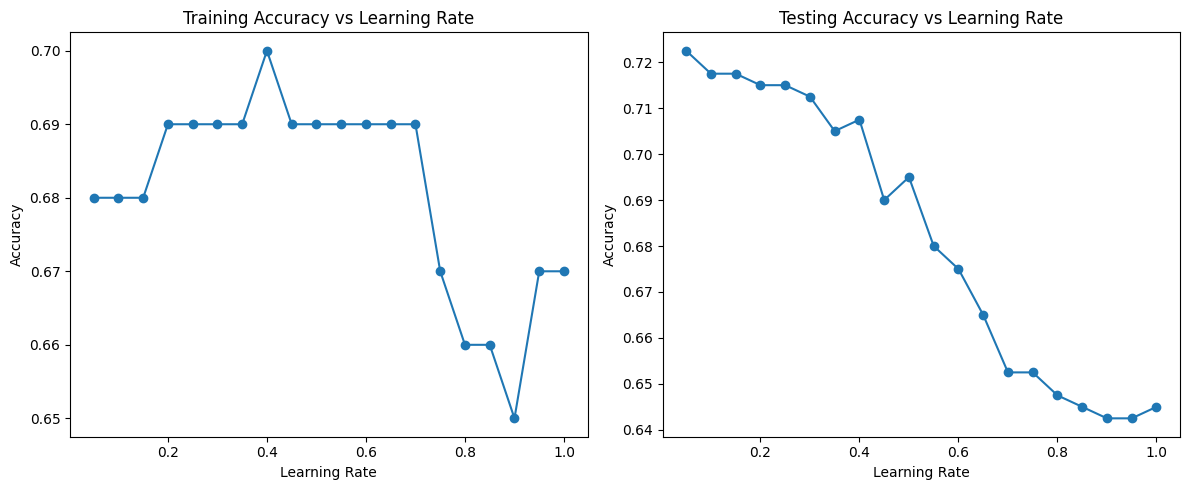

In [ ]:
# Plot the graphs for accuracy results
learning_rates = [0.05 * i for i in range(1, 21)]
train_accuracies = []
test_accuracies = []

for lr in learning_rates:
  train_acc, test_acc = gradient_descent(train_gd, test_gd, learning_rate=lr)
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)

plt.figure(figsize=(12, 5))

# Training accuracy plot
plt.subplot(1, 2, 1)
plt.plot(learning_rates, train_accuracies, marker='o')
plt.title('Training Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

# Testing accuracy plot
plt.subplot(1, 2, 2)
plt.plot(learning_rates, test_accuracies, marker='o')
plt.title('Testing Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


#ID3 Decision Tree

In this section, you will implement the ID3 Decision Tree algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that there are **no missing values** in the train or test data.


## Algorithm

(85 points)

Following are the data files that will be provided to you for the ID3 algorithm implementation.

*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'

In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

In a decision tree, if you reach a leaf node but still have examples that belong to different classes, then choose the most frequent class (among the instances at the leaf node). If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes, then choose the class that is most frequent in the entire training set. You do not need to implement pruning. Also, don’t forget to use logarithm base 2 when computing entropy and set (0 log 0) to 0.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments. The code should output the following 3 things:

*   Print the Decision Tree created, in the following example format:

    ```
    attr1 = 0 :
        attr2 = 0 :
            attr3 = 0 : 1 -- 4
            attr3 = 1 : 0 -- 9
        attr2 = 1 :
            attr4 = 0 : 0 -- 2
            attr4 = 1 : 1 -- 10
    attr1 = 1 :
        attr2 = 1 : 1 -- 17

    ```

*   Accuracy on the Training data = x %
*   Accuracy on the Test data = x %





In [ ]:
# Data file name variables
train = basePath + "id3-train.dat"
test = basePath + "id3-test.dat"


In [ ]:
# Entropy Calculation
def entropy(labels):
  label_counts = Counter(labels)
  total_count = len(labels)
  entropy_value = 0.0
  for count in label_counts.values():
    probability = count / total_count
    entropy_value -= probability * np.log2(probability)
  return entropy_value

# Information Gain Calculation
def information_gain(data, split_attribute, target_attribute):
    total_entropy = entropy(data[target_attribute])
    values, counts = np.unique(data[split_attribute], return_counts=True)
    weighted_entropy = sum(
        (counts[i] / np.sum(counts)) * entropy(data.where(data[split_attribute] == values[i]).dropna()[target_attribute])
        for i in range(len(values))
    )
    return total_entropy - weighted_entropy

# ID3 Algorithm
def id3(data, original_data, features, target_attribute, parent_node_class=None):
  if len(np.unique(data[target_attribute])) <= 1:
    return np.unique(data[target_attribute])[0]
  elif len(data) == 0:
    return np.unique(original_data[target_attribute])[np.argmax(np.unique(original_data[target_attribute], return_counts=True)[1])]
  elif len(features) == 0:
    return parent_node_class
  else:
    parent_node_class = np.unique(data[target_attribute])[np.argmax(np.unique(data[target_attribute], return_counts=True)[1])]
    item_values = [information_gain(data, feature, target_attribute) for feature in features]
    best_feature_index = np.argmax(item_values)
    best_feature = features[best_feature_index]
    tree = {best_feature: {}}
    features = [i for i in features if i != best_feature]
    for value in np.unique(data[best_feature]):
      sub_data = data.where(data[best_feature] == value).dropna()
      subtree = id3(sub_data, original_data, features, target_attribute, parent_node_class)
      tree[best_feature][value] = subtree
    return tree



In [ ]:
# Read the data files
train_id3 = pd.read_csv(basePath + "id3-train.dat", delim_whitespace=True)
test_id3 = pd.read_csv(basePath + "id3-test.dat", delim_whitespace=True)

# List of feature names
features = train_id3.columns[:-1].tolist()
target_attribute = train_id3.columns[-1]

# Create the decision tree using the ID3 algorithm
tree = id3(train_id3, train_id3, features, target_attribute)

# Function to print the decision tree
def print_tree(tree, depth=0):
  if isinstance(tree, dict):
    for key, value in tree.items():
      for sub_key, sub_value in value.items():
        if isinstance(sub_value, dict):
          print(' ' * depth * 4 + str(key) + ' = ' + str(int(sub_key)) + ' :')
          print_tree(sub_value, depth + 1)
        else:
          print(' ' * depth * 4 + str(key) + ' = ' + str(int(sub_key)) + ' : ' + str(int(sub_value)) + ' -- ' + str(depth))
  else:
    print(' ' * depth * 4 + str(int(tree)) + ' -- ' + str(depth))


# Print the created decision tree
print_tree(tree)

# Function to predict using the decision tree
def predict(tree, instance):
  if not isinstance(tree, dict):
    return tree
  attribute = list(tree.keys())[0]
  if instance[attribute] in tree[attribute]:
    return predict(tree[attribute][instance[attribute]], instance)
  else:
    return 0  # Default

# Function to calculate the accuracy of the decision tree
def calculate_accuracy(data, tree):
  correct_predictions = sum(predict(tree, row) == row[target_attribute] for index, row in data.iterrows())
  return correct_predictions / len(data)

# Calculate and print the accuracy on the training data
train_accuracy = calculate_accuracy(train_id3, tree)
print(f"Accuracy on Training data = {train_accuracy * 100:.2f} %")

# Calculate and print the accuracy on the testing data
test_accuracy = calculate_accuracy(test_id3, tree)
print(f"Accuracy on Testing data = {test_accuracy * 100:.2f} %")


attr5 = 0 :
    attr6 = 0 :
        attr2 = 0 :
            attr1 = 0 :
                attr4 = 0 :
                    attr3 = 0 : 0 -- 5
                    attr3 = 1 : 0 -- 5
                attr4 = 1 :
                    attr3 = 0 : 0 -- 5
                    attr3 = 1 : 0 -- 5
            attr1 = 1 :
                attr4 = 0 :
                    attr3 = 0 : 0 -- 5
                    attr3 = 1 : 0 -- 5
                attr4 = 1 : 0 -- 4
        attr2 = 1 :
            attr4 = 0 :
                attr3 = 0 : 0 -- 4
                attr3 = 1 :
                    attr1 = 0 : 0 -- 5
                    attr1 = 1 : 0 -- 5
            attr4 = 1 :
                attr1 = 0 :
                    attr3 = 0 : 0 -- 5
                    attr3 = 1 : 0 -- 5
                attr1 = 1 :
                    attr3 = 0 : 0 -- 5
                    attr3 = 1 : 0 -- 5
    attr6 = 1 :
        attr4 = 0 :
            attr2 = 0 :
                attr3 = 0 :
                    attr1 = 0 : 0 -- 5
   

##Extra Credit - Learning Curve

(05 points)

Instead of taking the entire training data (all 800 instances), loop through to select 'x' instances in the increments of 40 (i.e. 40, 80, 120, and so on). For each selected number 'x', randomly pick the example instances from the training data and call the ID3 function to create the decision tree. Calculate the accuracy of the created ID3 tree on the Test data file. Plot the corresponding graph, aka Learning Curve.


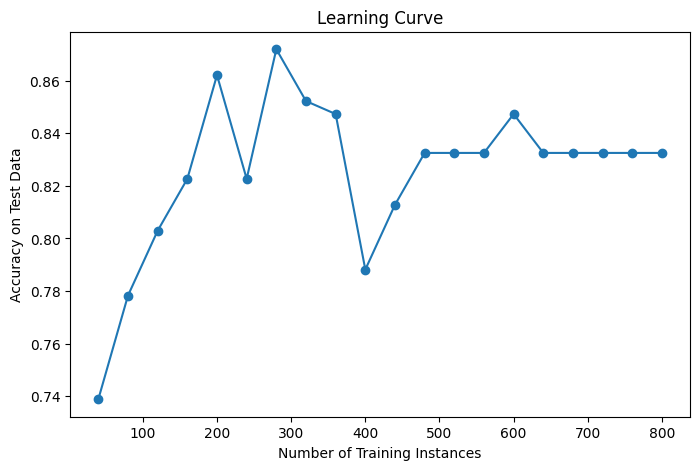

In [ ]:
import random

# Learning Curve Function
def learning_curve(train_data, test_data, target_attribute, increments=40):
    accuracies = []
    for i in range(increments, len(train_data) + 1, increments):
        sample = train_data.sample(i)
        tree = id3(sample, sample, sample.columns[:-1].tolist(), target_attribute)
        accuracy = calculate_accuracy(test_data, tree)
        accuracies.append((i, accuracy))
    return accuracies

learning_accuracies = learning_curve(train_id3, test_id3, target_attribute)

# Plot Learning Curve
x_vals = [x for x, y in learning_accuracies]
y_vals = [y for x, y in learning_accuracies]

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, marker='o')
plt.title('Learning Curve')
plt.xlabel('Number of Training Instances')
plt.ylabel('Accuracy on Test Data')
plt.show()


#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (40 points) Gradient Descent Algorithm
*   (05 points) Extra Credit - GD Accuracy Plots
*   (85 points) ID3 Algorithm
*   (05 points) Extra Credit - ID3 Learning Curve
